In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
import numpy as np
import streamlit as st

In [2]:
st.title("Investment Portfolio Dashboard/Yatırım Portföy Panosu")
assest=st.text_input("Provide you assets (comma-sepearated)/Varlıklarınızı sağlayın (virgülle ayrılmış)", "BIMAS.IS, AKBNK.IS, TUPRS.IS, VAKBN.IS, GARAN.IS")
start=st.date_input("Pick a starting date for your analysis/Analiziniz için bir başlangıç ​​tarihi seçin",value=pd.to_datetime("2022-06-01"))
data=yf.download(assest,start=start)["Adj Close"]

2023-06-11 21:57:20.057 
  command:

    streamlit run C:\Users\Serkan POLAT\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%***********************]  5 of 5 completed


In [3]:
data

,AKBNK.IS,BIMAS.IS,GARAN.IS,TUPRS.IS,VAKBN.IS
Date,,,,,
2022-06-01,7.675239,82.339432,13.963914,36.016037,4.33
2022-06-02,8.010917,85.446579,14.001077,35.962955,4.35
2022-06-03,7.947411,85.592232,13.991786,36.400883,4.34
2022-06-06,8.255872,85.883514,14.995180,37.356354,4.45
2022-06-07,8.047206,84.427040,14.539937,38.006603,4.37
...,...,...,...,...,...
2023-06-05,18.170000,154.100006,29.480000,73.099998,10.04
2023-06-06,18.040001,155.100006,29.040001,73.300003,9.92
2023-06-07,18.389999,160.699997,29.980000,77.449997,10.08


In [4]:
ret_df=data.pct_change()
cumul_ret=(ret_df+1).cumprod()-1
pf_cumul_ret=cumul_ret.mean(axis=1)

In [5]:
cumul_ret

,AKBNK.IS,BIMAS.IS,GARAN.IS,TUPRS.IS,VAKBN.IS
Date,,,,,
2022-06-01,NaN,NaN,NaN,NaN,NaN
2022-06-02,0.043735,0.037736,0.002661,-0.001474,0.004619
2022-06-03,0.035461,0.039505,0.001996,0.010685,0.002310
2022-06-06,0.075650,0.043042,0.073852,0.037214,0.027714
2022-06-07,0.048463,0.025354,0.041251,0.055269,0.009238
...,...,...,...,...,...
2023-06-05,1.367353,0.871521,1.111156,1.029651,1.318707
2023-06-06,1.350416,0.883666,1.079646,1.035205,1.290993
2023-06-07,1.396017,0.951677,1.146963,1.150431,1.327945


In [6]:
pf_cumul_ret

Date
2022-06-01         NaN
2022-06-02    0.017455
2022-06-03    0.017991
2022-06-06    0.051495
2022-06-07    0.035915
                ...   
2023-06-05    1.139678
2023-06-06    1.127985
2023-06-07    1.194606
2023-06-08    1.215286
2023-06-09    1.210505
Length: 257, dtype: float64

In [7]:
benchmark=yf.download("XU100.IS", start=start)["Adj Close"]
bench_ret=benchmark.pct_change()
bench_dev=(bench_ret+1).cumprod()-1

[*********************100%***********************]  1 of 1 completed


In [8]:
bench_dev

Date
2022-06-01         NaN
2022-06-02    0.012769
2022-06-03    0.012652
2022-06-06    0.030870
2022-06-07    0.030909
                ...   
2023-06-05    1.091521
2023-06-06    1.097789
2023-06-07    1.164902
2023-06-08    1.162099
2023-06-09    1.190322
Name: Adj Close, Length: 257, dtype: float64

In [9]:
W=(np.ones(len(ret_df.cov()))/len(ret_df.cov()))
pf_std=(W.dot(ret_df.cov()).dot(W))**(1/2)

In [10]:
ret_df.cov()

,AKBNK.IS,BIMAS.IS,GARAN.IS,TUPRS.IS,VAKBN.IS
AKBNK.IS,0.001580,0.000597,0.001411,0.000217,0.001311
BIMAS.IS,0.000597,0.000728,0.000565,0.000399,0.000514
GARAN.IS,0.001411,0.000565,0.001613,0.001418,0.001274
TUPRS.IS,0.000217,0.000399,0.001418,0.146135,0.000625
VAKBN.IS,0.001311,0.000514,0.001274,0.000625,0.001955


In [11]:
st.subheader("Portfolio vs Index Development/Portföy ve Endeks Geliştirme")
tog=pd.concat([bench_dev,pf_cumul_ret],axis=1)
tog.columns=["XU100 Performance","Portfolio Performance/Portföy Performansı"]

In [12]:
tog

,XU100 Performance,Portfolio Performance/Portföy Performansı
Date,,
2022-06-01,NaN,NaN
2022-06-02,0.012769,0.017455
2022-06-03,0.012652,0.017991
2022-06-06,0.030870,0.051495
2022-06-07,0.030909,0.035915
...,...,...
2023-06-05,1.091521,1.139678
2023-06-06,1.097789,1.127985
2023-06-07,1.164902,1.194606


In [13]:
st.line_chart(data=tog)

DeltaGenerator()

In [14]:
st.subheader("Portfolio Risk/Portföy Riski:")
pf_std
st.subheader("Benchmark Risk/Kıyaslama Riski:")
bench_risk=bench_ret.std()
bench_risk

0.02283035275572343

DeltaGenerator()

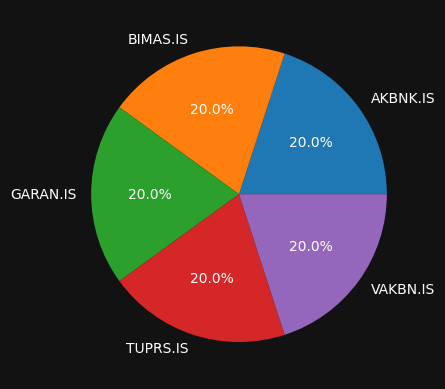

In [15]:
st.subheader("Portfolio composition/Portföy Kompozisyonu:")
fig, ax = plt.subplots (facecolor='#121212')
ax.pie (W, labels=data.columns, autopct='%1.1f%%', textprops={'color': 'white' })
st.pyplot (fig)